In [1]:
import numpy as np
from math import sin, cos, tan, pi, sqrt
import matplotlib.pyplot as plt

In [2]:
l = 0.1  # m
delta_t = 1.  # sec

In [3]:
def sample_normal_distribution(b):
    """
    sample normal distribution with 0 mean, variance b
    """
    rand = np.random.uniform(low=-1.0, high=1.0, size=12)
    return b * np.sum(rand) / 6

In [4]:
def sample_bicycle_motion_model(x_tm1, u):
    """
    Sample bicycle's velocity motion model
    Input:
        x_tm1 (np.ndarray) - shape 3,: previous pose
        u (np.ndarray) - shape 2,: command (v, alpha)
    """
    v, alpha = u
    x, y, theta = x_tm1
    
    # perturbe command signal
    sigma_v = 0.5 * v
    sigma_alpha = 25. * pi / 180.
    v_hat = v + sample_normal_distribution(sigma_v**2)
    alpha_hat = alpha + sample_normal_distribution(sigma_alpha**2)
    
    # generate sample
    x_p = x + v_hat * delta_t * (cos(theta) - tan(alpha_hat) * sin(theta))
    y_p = y + v_hat * delta_t * (sin(theta) + tan(alpha_hat) * cos(theta))
    theta_p = theta + v_hat * delta_t * tan(alpha_hat) / l
    
    return np.array([x_p, y_p, theta_p])

In [5]:
# initial pose
x_tm1 = np.array([0., 0., pi/4])
u_t = np.array([sqrt(2.), 0.])
sample = [sample_bicycle_motion_model(x_tm1, u_t) for i in range(500)]

In [6]:
def plot_sample(x_t, length=0.05):
    """
    Plot a pose
    """
    x, y, theta = x_t
    x_tip = x + length * cos(theta)
    y_tip = y + length * sin(theta)
    plt.plot([x, x_tip], [y, y_tip], 'k-')
    

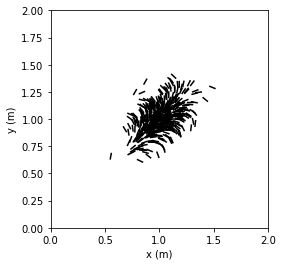

In [7]:
plt.figure()
plt.xlim(0., 2.)
plt.ylim(0., 2.)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
for x_t in sample:
    plot_sample(x_t)